Analise melhores clientes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from classes.classdatabasemanager import DatabaseManager
from utils.logger_utils import logging

# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager()

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_clientes = db_manager.fetch_data_to_df("SELECT * FROM clientes;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_clientes.head())
display(df_vendas.head())

,id,nome,preco,categoria
0,1,Portátil Dell XPS 13,120000,Portáteis
1,2,MacBook Pro 16,250000,Portáteis
2,3,Monitor LG UltraGear,45000,Monitores
3,4,Teclado Mecânico HyperX,15000,Teclados
4,5,Rato Logitech MX Master,12000,Ratos


,id,nome,email,id_loja
0,1,Cliente 1,cliente1@email.com,4
1,2,Cliente 2,cliente2@email.com,5
2,3,Cliente 3,cliente3@email.com,3
3,4,Cliente 4,cliente4@email.com,4
4,5,Cliente 5,cliente5@email.com,1


,id,id_produto,id_cliente,id_loja,quantidade,data
0,1,6,83,4,3,2024-08-09
1,2,7,28,1,3,2024-08-16
2,3,10,64,2,2,2024-03-08
3,4,5,86,4,2,2024-11-18
4,5,3,54,3,2,2024-12-10


In [2]:
# Juntar vendas com clientes
df_merged = df_vendas.merge(df_clientes, left_on="id_cliente", right_on="id")

# Juntar o resultado com produtos
df_merged = df_merged.merge(df_produtos, left_on="id_produto", right_on="id")

df_merged["Gasto Total"]=df_merged["preco"]*df_merged["quantidade"]
display(df_merged)



,id_x,id_produto,id_cliente,id_loja_x,quantidade,data,id_y,nome_x,email,id_loja_y,id,nome_y,preco,categoria,Gasto Total
0,1,6,83,4,3,2024-08-09,83,Cliente 83,cliente83@email.com,4,6,Placa Gráfica RTX 3080,350000,Placas Gráficas,1050000
1,2,7,28,1,3,2024-08-16,28,Cliente 28,cliente28@email.com,2,7,Processador AMD Ryzen 9,180000,Processadores,540000
2,3,10,64,2,2,2024-03-08,64,Cliente 64,cliente64@email.com,5,10,Fonte Corsair 750W,60000,Fontes de Alimentação,120000
3,4,5,86,4,2,2024-11-18,86,Cliente 86,cliente86@email.com,1,5,Rato Logitech MX Master,12000,Ratos,24000
4,5,3,54,3,2,2024-12-10,54,Cliente 54,cliente54@email.com,5,3,Monitor LG UltraGear,45000,Monitores,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,6,5,5,4,2024-09-29,5,Cliente 5,cliente5@email.com,1,6,Placa Gráfica RTX 3080,350000,Placas Gráficas,1400000
296,297,7,62,2,3,2024-07-28,62,Cliente 62,cliente62@email.com,5,7,Processador AMD Ryzen 9,180000,Processadores,540000
297,298,5,77,3,3,2024-07-12,77,Cliente 77,cliente77@email.com,4,5,Rato Logitech MX Master,12000,Ratos,36000
298,299,4,71,2,1,2024-05-27,71,Cliente 71,cliente71@email.com,2,4,Teclado Mecânico HyperX,15000,Teclados,15000


In [3]:
#cliente que mais gastou top 5
cliente_max=df_merged.groupby("nome_x")["Gasto Total"].sum().sort_values(ascending=False).reset_index()
cliente_max=cliente_max.rename(columns={"nome_x": "Cliente"})
display(cliente_max.head(5))

,Cliente,Gasto Total
0,Cliente 75,3748000
1,Cliente 79,3690000
2,Cliente 45,3370000
3,Cliente 3,3035000
4,Cliente 62,3020000


In [4]:
#clientes que mais compraram top5
cliente_qt=df_merged.groupby("nome_x")["quantidade"].sum().sort_values(ascending=False).reset_index()
cliente_qt=cliente_qt.rename(columns={"nome_x": "Cliente"})
display(cliente_qt.head(5))

,Cliente,quantidade
0,Cliente 49,24
1,Cliente 71,23
2,Cliente 1,22
3,Cliente 64,20
4,Cliente 65,19


TypeError: 'module' object is not callable

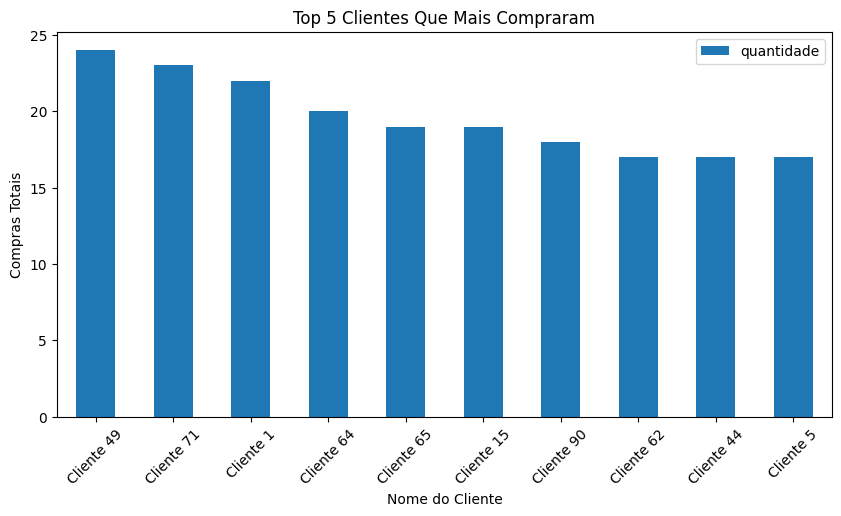

In [5]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot

criar_graficos_matplotlib_pyplot(cliente_qt, "Top 5 Clientes Que Mais Compraram", "Nome do Cliente", "Compras Totais")

TypeError: 'module' object is not callable

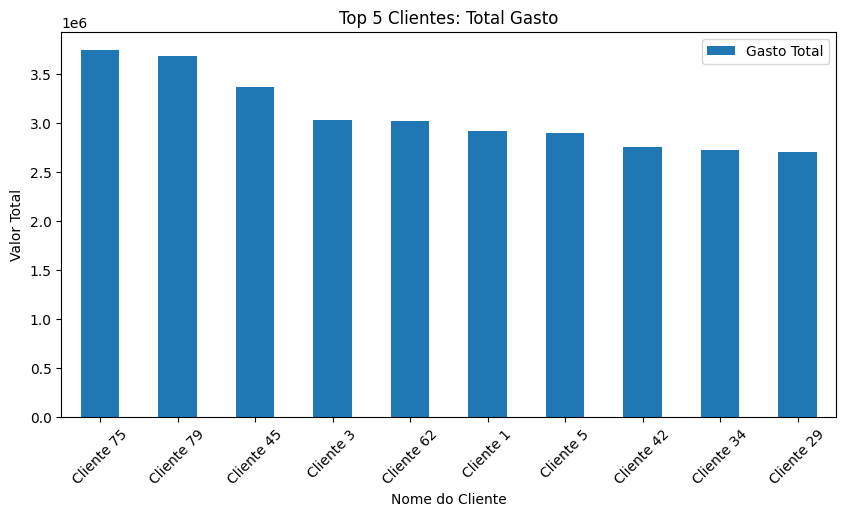

In [22]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot

criar_graficos_matplotlib_pyplot(cliente_max, "Top 5 Clientes: Total Gasto", "Nome do Cliente", "Valor Total")